In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_excel('data/default of credit card clients.xls',
                   skiprows=1, index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
# double-check datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [3]:
report = ProfileReport(df, interactions=None)
report.to_file('cc_defaults.html')

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.corr().loc['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [5]:
train_features = df.drop('default payment next month', axis=1)
train_targets = df['default payment next month']

### sklearn logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression

lr_sklearn = LogisticRegression()
lr_sklearn.fit(train_features, train_targets)

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
lr_sklearn.score(train_features, train_targets)

0.7788333333333334

In [8]:
train_targets.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [9]:
predictions = lr_sklearn.predict(train_features)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
lr_sklearn.predict(train_features.iloc[-1].values.reshape(1, -1))

array([0], dtype=int64)

In [11]:
lr_sklearn.predict_proba(train_features)

array([[0.5413097 , 0.4586903 ],
       [0.65880917, 0.34119083],
       [0.65864368, 0.34135632],
       ...,
       [0.59329774, 0.40670226],
       [0.977336  , 0.022664  ],
       [0.60781943, 0.39218057]])

In [12]:
proba_predictions = lr_sklearn.predict_proba(train_features)[:, 1]
proba_predictions = (proba_predictions >= 0.5).astype('int')

In [13]:
import numpy as np

predictions = lr_sklearn.predict(train_features)
np.array_equal(predictions, np.round(proba_predictions))

True

#### Predicting the probability for a single datapoint

In [14]:
train_features.iloc[-1].values.reshape(1, -1)

array([[50000,     1,     2,     1,    46,     0,     0,     0,     0,
            0,     0, 47929, 48905, 49764, 36535, 32428, 15313,  2078,
         1800,  1430,  1000,  1000,  1000]], dtype=int64)

In [15]:
train_targets.iloc[-1]

1

In [16]:
lr_sklearn.predict_proba(train_features.iloc[-1].values.reshape(1, -1))

array([[0.60781943, 0.39218057]])

## How logistic regression works

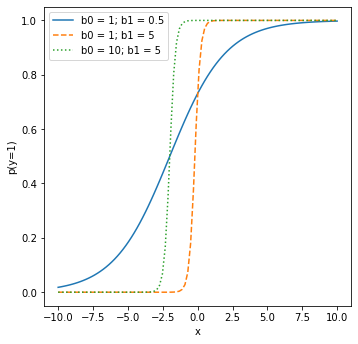

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 

# f, ax = plt.subplots(1, 1)
f = plt.figure(figsize=(5.5, 5.5))
x = np.linspace(-10, 10, 100) 
y = 1/(1 + np.exp(-(1 + 0.5*x)))
  
plt.plot(x, y, label='b0 = 1; b1 = 0.5') 
plt.xlabel("x") 
plt.ylabel("p(y=1)")

y = 1/(1 + np.exp(-(1 + 5*x)))
plt.plot(x, y, label='b0 = 1; b1 = 5', linestyle='dashed') 
plt.xlabel("x") 
plt.ylabel("p(y=1)")

y = 1/(1 + np.exp(-(10 + 5*x)))
plt.plot(x, y, label='b0 = 10; b1 = 5', linestyle='dotted') 
plt.xlabel("x") 
plt.ylabel("p(y=1)")


plt.legend()

In [18]:
lr_sklearn.intercept_

array([-2.24725158e-05])

In [19]:
lr_sklearn.coef_

array([[-5.06174142e-06, -3.90339041e-05, -4.82612466e-05,
        -4.08602655e-05, -6.92131758e-04,  5.07229250e-05,
         3.93757000e-05,  3.47522424e-05,  3.27504528e-05,
         3.07778722e-05,  2.87985222e-05, -7.78289355e-06,
        -1.39246756e-07,  2.43678773e-06,  3.72212875e-06,
         2.41779144e-06,  3.85986835e-06, -3.79861658e-05,
        -2.65870439e-05, -1.43884850e-05, -1.07654293e-05,
        -1.02277973e-05,  4.02837208e-07]])

In [20]:
np.exp(lr_sklearn.coef_)

array([[0.99999494, 0.99996097, 0.99995174, 0.99995914, 0.99930811,
        1.00005072, 1.00003938, 1.00003475, 1.00003275, 1.00003078,
        1.0000288 , 0.99999222, 0.99999986, 1.00000244, 1.00000372,
        1.00000242, 1.00000386, 0.99996201, 0.99997341, 0.99998561,
        0.99998923, 0.99998977, 1.0000004 ]])

### Re-fit to scaled data, then plot feature importances

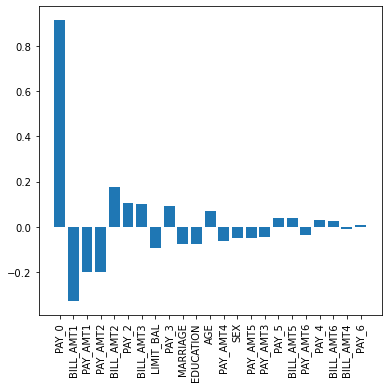

In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features)
scaled_lr_model = LogisticRegression(random_state=42)
scaled_lr_model.fit(scaled_features, train_targets)

logit_coef = np.exp(scaled_lr_model.coef_[0]) - 1
idx = abs(logit_coef).argsort()[::-1]
f = plt.figure(figsize=(5.5, 5.5))
plt.bar(range(len(idx)), logit_coef[idx])
_ = plt.xticks(range(len(idx)), train_features.columns[idx], rotation=90)
plt.tight_layout()

### Statsmodels logistic regression

In [22]:
import statsmodels.api as sm

lr_model = sm.Logit(train_targets, sm.add_constant(train_features))
lr_results = lr_model.fit()
lr_results.summary()

Optimization terminated successfully.
         Current function value: 0.464620
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29976
Method:                                   MLE   Df Model:                           23
Date:                        Sat, 01 May 2021   Pseudo R-squ.:                  0.1207
Time:                                09:50:33   Log-Likelihood:                -13939.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6863      0.119     -5.784      0.000      -0.919      -0.454
LIMIT_BAL  -7.623e-07   1.57e-07     -4.859      0.000   -1.07e-06   -4.55e-07
SEX           -0.1087      0.031     -3.541      0.000      -0.169      -0.049
EDUCATION     -0.1016      0.021     -4.844      0.000      -0.143      -0.060
MARRIAGE      -0.1544      0.032     -4.869      0.000      -0.216      -0.092
AGE            0.0074      0.002      4.170      0.000       0.004       0.011
PAY_0          0.5774      0.018     32.632      0.000       0.543       0.612
PAY_2          0.0828      0.020      4.103      0.000       0.043       0.122
PAY_3          0.0721      0.023      3.192      0.001       0.028       0.116
PAY_4          0.0239      0.025      0.956      0.339      -0.025       0.073
PAY_5          0.0340      0.027      1.266      0.206      -0.019       0.087
PAY_6          0.0080      0.022      0.363      0.716      -0.035       0.051
BILL_AMT1  -5.492e-06   1.14e-06     -4.835      0.000   -7.72e-06   -3.27e-06
BILL_AMT2   2.356e-06    1.5e-06      1.566      0.117   -5.92e-07     5.3e-06
BILL_AMT3   1.365e-06   1.32e-06      1.032      0.302   -1.23e-06    3.96e-06
BILL_AMT4  -1.821e-07   1.35e-06     -0.135      0.893   -2.83e-06    2.46e-06
BILL_AMT5   6.155e-07   1.52e-06      0.405      0.685   -2.36e-06    3.59e-06
BILL_AMT6   3.938e-07   1.19e-06      0.330      0.742   -1.95e-06    2.74e-06
PAY_AMT1   -1.363e-05   2.31e-06     -5.913      0.000   -1.81e-05   -9.11e-06
PAY_AMT2   -9.616e-06   2.09e-06     -4.590      0.000   -1.37e-05   -5.51e-06
PAY_AMT3   -2.742e-06   1.72e-06     -1.592      0.111   -6.12e-06    6.34e-07
PAY_AMT4   -4.023e-06   1.78e-06     -2.254      0.024   -7.52e-06   -5.25e-07
PAY_AMT5   -3.311e-06   1.78e-06     -1.864      0.062   -6.79e-06    1.71e-07
PAY_AMT6   -2.064e-06    1.3e-06     -1.593      0.111    -4.6e-06    4.76e-07
==============================================================================
"""

In [23]:
lr_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                      Pseudo R-squared: 0.121     
Dependent Variable: default payment next month AIC:              27925.2001
Date:               2021-05-01 09:50           BIC:              28124.6150
No. Observations:   30000                      Log-Likelihood:   -13939.   
Df Model:           23                         LL-Null:          -15853.   
Df Residuals:       29976                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                 Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
const           -0.6863      0.1187    -5.7838    0.0000    -0.9188    -0.4537
LIMIT_BAL       -0.0000      0.0000    -4.8587    0.0000    -0.0000    -0.0000
SEX             -0.1087      0.0307    -3.5408    0.0004    -0.1688    -0.0485
EDUCATION       -0.1016      0.0210    -4.8444    0.0000    -0.1427    -0.0605
MARRIAGE        -0.1544      0.0317    -4.8687    0.0000    -0.2165    -0.0922
AGE              0.0074      0.0018     4.1703    0.0000     0.0039     0.0109
PAY_0            0.5774      0.0177    32.6324    0.0000     0.5427     0.6121
PAY_2            0.0828      0.0202     4.1033    0.0000     0.0433     0.1224
PAY_3            0.0721      0.0226     3.1915    0.0014     0.0278     0.1164
PAY_4            0.0239      0.0250     0.9555    0.3393    -0.0251     0.0729
PAY_5            0.0340      0.0269     1.2655    0.2057    -0.0187     0.0867
PAY_6            0.0080      0.0221     0.3632    0.7164    -0.0353     0.0514
BILL_AMT1       -0.0000      0.0000    -4.8352    0.0000    -0.0000    -0.0000
BILL_AMT2        0.0000      0.0000     1.5663    0.1173    -0.0000     0.0000
BILL_AMT3        0.0000      0.0000     1.0320    0.3021    -0.0000     0.0000
BILL_AMT4       -0.0000      0.0000    -0.1350    0.8926    -0.0000     0.0000
BILL_AMT5        0.0000      0.0000     0.4053    0.6852    -0.0000     0.0000
BILL_AMT6        0.0000      0.0000     0.3296    0.7417    -0.0000     0.0000
PAY_AMT1        -0.0000      0.0000    -5.9131    0.0000    -0.0000    -0.0000
PAY_AMT2        -0.0000      0.0000    -4.5903    0.0000    -0.0000    -0.0000
PAY_AMT3        -0.0000      0.0000    -1.5917    0.1115    -0.0000     0.0000
PAY_AMT4        -0.0000      0.0000    -2.2542    0.0242    -0.0000    -0.0000
PAY_AMT5        -0.0000      0.0000    -1.8635    0.0624    -0.0000     0.0000
PAY_AMT6        -0.0000      0.0000    -1.5928    0.1112    -0.0000     0.0000
===========================================================================

"""

In [24]:
selected_features = sm.add_constant(
    train_features).loc[:, lr_results.pvalues < 0.05]
lr_model_trimmed = sm.Logit(train_targets, selected_features)
lr_trimmed_results = lr_model_trimmed.fit()
lr_trimmed_results.summary()

Optimization terminated successfully.
         Current function value: 0.465428
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29987
Method:                                   MLE   Df Model:                           12
Date:                        Sat, 01 May 2021   Pseudo R-squ.:                  0.1192
Time:                                09:50:33   Log-Likelihood:                -13963.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7030      0.118     -5.936      0.000      -0.935      -0.471
LIMIT_BAL   -8.98e-07   1.53e-07     -5.889      0.000    -1.2e-06   -5.99e-07
SEX           -0.1048      0.031     -3.419      0.001      -0.165      -0.045
EDUCATION     -0.1044      0.021     -4.994      0.000      -0.145      -0.063
MARRIAGE      -0.1572      0.032     -4.966      0.000      -0.219      -0.095
AGE            0.0076      0.002      4.260      0.000       0.004       0.011
PAY_0          0.5920      0.018     33.765      0.000       0.558       0.626
PAY_2          0.0848      0.020      4.257      0.000       0.046       0.124
PAY_3          0.1200      0.018      6.525      0.000       0.084       0.156
BILL_AMT1  -1.766e-06   2.64e-07     -6.690      0.000   -2.28e-06   -1.25e-06
PAY_AMT1   -1.169e-05   2.08e-06     -5.624      0.000   -1.58e-05   -7.61e-06
PAY_AMT2   -8.209e-06   1.79e-06     -4.577      0.000   -1.17e-05   -4.69e-06
PAY_AMT4   -4.396e-06   1.55e-06     -2.834      0.005   -7.44e-06   -1.36e-06
==============================================================================
"""

In [25]:
lr_trimmed_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                      Pseudo R-squared: 0.119     
Dependent Variable: default payment next month AIC:              27951.6577
Date:               2021-05-01 09:50           BIC:              28059.6741
No. Observations:   30000                      Log-Likelihood:   -13963.   
Df Model:           12                         LL-Null:          -15853.   
Df Residuals:       29987                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                 Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
const           -0.7030      0.1184    -5.9358    0.0000    -0.9351    -0.4709
LIMIT_BAL       -0.0000      0.0000    -5.8885    0.0000    -0.0000    -0.0000
SEX             -0.1048      0.0306    -3.4192    0.0006    -0.1648    -0.0447
EDUCATION       -0.1044      0.0209    -4.9940    0.0000    -0.1453    -0.0634
MARRIAGE        -0.1572      0.0317    -4.9659    0.0000    -0.2192    -0.0951
AGE              0.0076      0.0018     4.2602    0.0000     0.0041     0.0111
PAY_0            0.5920      0.0175    33.7648    0.0000     0.5577     0.6264
PAY_2            0.0848      0.0199     4.2571    0.0000     0.0458     0.1239
PAY_3            0.1200      0.0184     6.5253    0.0000     0.0840     0.1561
BILL_AMT1       -0.0000      0.0000    -6.6899    0.0000    -0.0000    -0.0000
PAY_AMT1        -0.0000      0.0000    -5.6240    0.0000    -0.0000    -0.0000
PAY_AMT2        -0.0000      0.0000    -4.5775    0.0000    -0.0000    -0.0000
PAY_AMT4        -0.0000      0.0000    -2.8337    0.0046    -0.0000    -0.0000
===========================================================================

"""

In [26]:
lr_trimmed_results.predict(selected_features)

ID
1        0.526598
2        0.143535
3        0.206673
4        0.236682
5        0.132577
           ...   
29996    0.142965
29997    0.109561
29998    0.853243
29999    0.172265
30000    0.269257
Length: 30000, dtype: float64

In [27]:
predictions = (lr_trimmed_results.predict(
    selected_features) > 0.5).astype('int')

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, predictions)

0.8091

Using the same Newton solver with sklearn yields similar accuracy and coefficients as with statsmodels:

In [29]:
lr_sklearn = LogisticRegression(solver='newton-cg', max_iter=1000)
lr_sklearn.fit(train_features, train_targets)
print(lr_sklearn.score(train_features, train_targets))
lr_sklearn.coef_

C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarn

0.8111


C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.wa

array([[-7.65728530e-07, -1.10570053e-01, -1.02326712e-01,
        -1.57135608e-01,  7.26690169e-03,  5.77183731e-01,
         8.27601061e-02,  7.20143655e-02,  2.39180317e-02,
         3.40383489e-02,  8.15876572e-03, -5.49429646e-06,
         2.35762624e-06,  1.36693575e-06, -1.82521980e-07,
         6.15315551e-07,  3.93711154e-07, -1.36415892e-05,
        -9.62347385e-06, -2.74399632e-06, -4.02619917e-06,
        -3.31037334e-06, -2.06458807e-06]])

In [30]:
lr_sklearn.n_iter_

array([185])

In [31]:
accuracy_score(train_targets, (lr_results.predict(
    sm.add_constant(train_features)) > 0.5).astype('int'))

0.8109666666666666

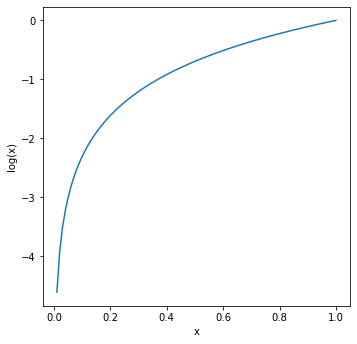

In [32]:
f = plt.figure(figsize=(5.5, 5.5))
x = np.linspace(0.01, 1, 100)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
_ = plt.ylabel('log(x)')

## Regularization

In [33]:
lr_sklearn = LogisticRegression(penalty='l1', solver='liblinear')
lr_sklearn.fit(train_features, train_targets)
print(lr_sklearn.score(train_features, train_targets))
lr_sklearn.coef_

0.8111


array([[-7.67415625e-07, -1.10464076e-01, -1.02188813e-01,
        -1.57322543e-01,  7.20811318e-03,  5.77106705e-01,
         8.26883082e-02,  7.20854876e-02,  2.38772522e-02,
         3.39423442e-02,  7.99395413e-03, -5.45484613e-06,
         2.29099635e-06,  1.40514436e-06, -2.14454479e-07,
         6.60917074e-07,  3.71645560e-07, -1.36072855e-05,
        -9.65614085e-06, -2.73093192e-06, -4.05340761e-06,
        -3.29364916e-06, -2.07150796e-06]])

In [34]:
lr_sklearn.n_iter_

array([20], dtype=int32)

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features)

lr_sklearn = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
lr_sklearn.fit(scaled_features, train_targets)
print(lr_sklearn.score(scaled_features, train_targets))
lr_sklearn.coef_

0.8090666666666667


array([[-0.09177583, -0.03149434, -0.04190645, -0.05807328,  0.04759609,
         0.638766  ,  0.09257704,  0.09008588,  0.02364863,  0.03699925,
         0.00536357, -0.11606928,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.12243714, -0.09714686, -0.02069721,
        -0.03081422, -0.02785163, -0.01939372]])

In [36]:
# intercept is not 0
lr_sklearn.intercept_

array([-1.4079757])

In [37]:
train_features.columns[lr_sklearn.coef_[0] == 0]

Index(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], dtype='object')

#### Regularization with statsmodels

In [38]:
scaled_features_df = pd.DataFrame(
    scaled_features, columns=train_features.columns, index=train_features.index)
lr_model = sm.Logit(train_targets, sm.add_constant(scaled_features_df))
reg_results = lr_model.fit_regularized(alpha=100)
reg_results.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47567931369409666
            Iterations: 57
            Function evaluations: 57
            Gradient evaluations: 57


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29981
Method:                                   MLE   Df Model:                           18
Date:                        Sat, 01 May 2021   Pseudo R-squ.:                  0.1187
Time:                                09:50:39   Log-Likelihood:                -13970.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4080      0.016    -88.843      0.000      -1.439      -1.377
LIMIT_BAL     -0.0918      0.020     -4.634      0.000      -0.131      -0.053
SEX           -0.0315      0.015     -2.122      0.034      -0.061      -0.002
EDUCATION     -0.0419      0.016     -2.600      0.009      -0.074      -0.010
MARRIAGE      -0.0581      0.016     -3.562      0.000      -0.090      -0.026
AGE            0.0476      0.016      2.933      0.003       0.016       0.079
PAY_0          0.6387      0.020     32.484      0.000       0.600       0.677
PAY_2          0.0926      0.024      3.869      0.000       0.046       0.139
PAY_3          0.0901      0.027      3.384      0.001       0.038       0.142
PAY_4          0.0237      0.029      0.821      0.412      -0.033       0.080
PAY_5          0.0370      0.030      1.230      0.219      -0.022       0.096
PAY_6          0.0053      0.025      0.214      0.831      -0.044       0.054
BILL_AMT1     -0.1160      0.019     -6.130      0.000      -0.153      -0.079
BILL_AMT2           0        nan        nan        nan         nan         nan
BILL_AMT3           0        nan        nan        nan         nan         nan
BILL_AMT4           0        nan        nan        nan         nan         nan
BILL_AMT5           0        nan        nan        nan         nan         nan
BILL_AMT6           0        nan        nan        nan         nan         nan
PAY_AMT1      -0.1224      0.028     -4.330      0.000      -0.178      -0.067
PAY_AMT2      -0.0972      0.033     -2.974      0.003      -0.161      -0.033
PAY_AMT3      -0.0207      0.022     -0.919      0.358      -0.065       0.023
PAY_AMT4      -0.0308      0.021     -1.455      0.146      -0.072       0.011
PAY_AMT5      -0.0278      0.020     -1.378      0.168      -0.067       0.012
PAY_AMT6      -0.0194      0.020     -0.955      0.339      -0.059       0.020
==============================================================================
"""

## Hyperparameters and cross-validation

In [39]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100],
                             solver='liblinear',
                             penalty='l1',
                             n_jobs=-1,
                             random_state=42)
lr_cv.fit(scaled_features, train_targets)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], n_jobs=-1, penalty='l1',
                     random_state=42, solver='liblinear')

In [40]:
lr_cv.C_

array([1.])

In [41]:
lr_cv.scores_[1].mean(axis=0)

array([0.78556667, 0.80863333, 0.8094    , 0.80996667, 0.80993333,
       0.80993333])

### Using H2O for logistic regression
Ideally we would use the scaled version of the data here so the feature importances are more comparable.

There are a lot of settings for the GLM, which can be found in the documentation:
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html
https://docs.h2o.ai/h2o/latest-stable/h2o-r/docs/reference/h2o.glm.html

In [42]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import h2o
h2o.init()

glm_model = H2OGeneralizedLinearEstimator(family="binomial",
                                          lambda_=0,
                                          compute_p_values=True)

hdf = h2o.H2OFrame(df)
response_col = 'default payment next month'
predictors = df.drop(response_col, axis=1).columns.tolist()

glm_model.train(predictors, response_col, training_frame=hdf)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15+36-1562, mixed mode, sharing)
  Starting server from C:\Users\words\anaconda3\envs\datasci\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\words\AppData\Local\Temp\tmpyhfah541
  JVM stdout: C:\Users\words\AppData\Local\Temp\tmpyhfah541\h2o_words_started_from_python.out
  JVM stderr: C:\Users\words\AppData\Local\Temp\tmpyhfah541\h2o_words_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_words_e2ba31
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.977 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


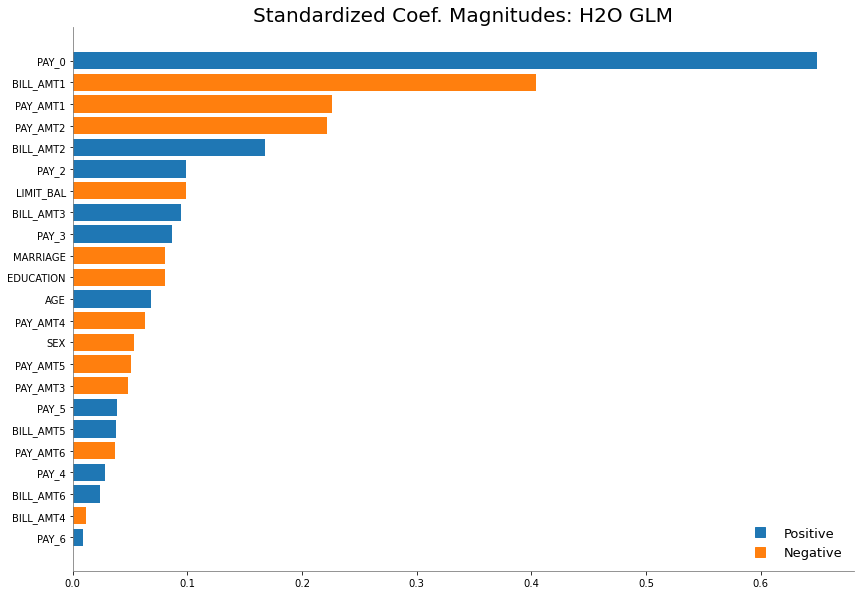

In [43]:
glm_model.std_coef_plot()

# Naive Bayes

In [44]:
df[(df['default payment next month'] == 0) & (
    df['PAY_0'] == -1)].shape[0] / df.shape[0]

0.15773333333333334

We can use other NB algos if we properly prepare our data:

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
temp_feats = train_features[['LIMIT_BAL', 'SEX']].copy()
temp_feats['LIMIT_BAL']

nb.fit(temp_feats, train_targets)
nb.score(temp_feats, train_targets)

0.7788

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_features, train_targets)
gnb.score(train_features, train_targets)

0.378

## KNN

Scale only numeric features, keep categorical features the same.

In [47]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [48]:
numeric_columns = ['LIMIT_BAL', 'AGE'] + \
    [f'BILL_AMT{i}' for i in range(1, 7)] + \
    [f'PAY_AMT{i}' for i in range(1, 7)]
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE'] + \
    ['PAY_0'] + [f'PAY_{i}' for i in range(2, 6)]

scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(train_features[numeric_columns])

scaled_features = pd.concat([pd.DataFrame(data=scaled_numeric_features, columns=numeric_columns, index=df.index),
                             train_features[categorical_columns]], axis=1)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(scaled_features, train_targets)
knn.score(scaled_features, train_targets)

0.8462666666666666

# Multiclass classification

In [50]:
pay_0_target = df['PAY_0'].replace({i: 1 for i in range(1, 9)})
pay_0_features = df.drop(['PAY_0', 'default payment next month'], axis=1)

lr_multi = LogisticRegression(max_iter=1000)
lr_multi.fit(pay_0_features, pay_0_target)

LogisticRegression(max_iter=1000)

In [51]:
lr_multi.score(pay_0_features, pay_0_target)

0.6067666666666667

In [52]:
np.unique(lr_multi.predict(pay_0_features))

array([-2, -1,  0,  1], dtype=int64)

In [53]:
pay_0_target.value_counts()

 0    14737
 1     6818
-1     5686
-2     2759
Name: PAY_0, dtype: int64

In [54]:
lr_multi.predict_proba(pay_0_features).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [55]:
lr_multi.n_iter_

array([938])

In [56]:
lr_multi.coef_.shape

(4, 22)

In [57]:
multi_sm = sm.MNLogit(pay_0_target, sm.add_constant(pay_0_features))
multi_sm_results = multi_sm.fit()
multi_sm_results.summary()

Optimization terminated successfully.
         Current function value: 0.762369
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                  PAY_0   No. Observations:                30000
Model:                        MNLogit   Df Residuals:                    29931
Method:                           MLE   Df Model:                           66
Date:                Sat, 01 May 2021   Pseudo R-squ.:                  0.3754
Time:                        09:51:33   Log-Likelihood:                -22871.
converged:                       True   LL-Null:                       -36618.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
  PAY_0=-1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7368      0.328     26.622      0.000       8.094       9.380
LIMIT_BAL  -1.051e-06   2.92e-07     -3.596      0.000   -1.62e-06   -4.78e-07
SEX           -0.1590      0.072     -2.223      0.026      -0.299      -0.019
EDUCATION     -0.2542      0.044     -5.838      0.000      -0.339      -0.169
MARRIAGE      -0.0991      0.073     -1.351      0.177      -0.243       0.045
AGE            0.0074      0.004      1.684      0.092      -0.001       0.016
PAY_2          4.2855      0.114     37.478      0.000       4.061       4.510
PAY_3         -0.4013      0.079     -5.059      0.000      -0.557      -0.246
PAY_4          0.2645      0.088      3.013      0.003       0.092       0.437
PAY_5          0.1763      0.088      2.005      0.045       0.004       0.349
PAY_6          0.3368      0.070      4.840      0.000       0.200       0.473
BILL_AMT1  -1.451e-05      2e-06     -7.256      0.000   -1.84e-05   -1.06e-05
BILL_AMT2   -3.93e-05   3.27e-06    -12.005      0.000   -4.57e-05   -3.29e-05
BILL_AMT3  -8.032e-06   3.09e-06     -2.600      0.009   -1.41e-05   -1.98e-06
BILL_AMT4   2.279e-06   2.89e-06      0.789      0.430   -3.38e-06    7.94e-06
BILL_AMT5   -1.86e-06   3.16e-06     -0.589      0.556   -8.05e-06    4.33e-06
BILL_AMT6   -7.21e-06   2.64e-06     -2.734      0.006   -1.24e-05   -2.04e-06
PAY_AMT1    3.423e-05   3.06e-06     11.201      0.000    2.82e-05    4.02e-05
PAY_AMT2      3.8e-06   1.92e-06      1.975      0.048    2.95e-08    7.57e-06
PAY_AMT3    4.261e-07   2.74e-06      0.156      0.876   -4.94e-06    5.79e-06
PAY_AMT4     3.94e-07   2.84e-06      0.139      0.890   -5.17e-06    5.96e-06
PAY_AMT5    6.995e-08   2.96e-06      0.024      0.981   -5.72e-06    5.86e-06
PAY_AMT6   -2.944e-06   1.65e-06     -1.780      0.075   -6.19e-06    2.98e-07
------------------------------------------------------------------------------
   PAY_0=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9797      0.333     26.930      0.000       8.326       9.633
LIMIT_BAL  -4.532e-06   3.07e-07    -14.777      0.000   -5.13e-06   -3.93e-06
SEX           -0.2313      0.073     -3.155      0.002      -0.375      -0.088
EDUCATION     -0.0285      0.044     -0.651      0.515      -0.115       0.057
MARRIAGE       0.0287      0.075      0.383      0.702      -0.118       0.176
AGE           -0.0047      0.004     -1.053      0.292      -0.014       0.004
PAY_2          3.8719      0.114     33.887      0.000       3.648       4.096
PAY_3         -0.2820      0.079     -3.553      0.000      -0.438      -0.126
PAY_4          0.4448      0.088      5.082      0.000       0.273       0.616
PAY_5          0.2042      0.088      2.321      0.020       0.032       0.377
PAY_6          0.4338      0.070      6.226      0.000       0.297       0.570
BILL_AMT1   7.103e-06   1.76e-06      4.039      0.000    3.66e-06    1.05e-05
BI

In [58]:
multi_sm_results.predict(sm.add_constant(pay_0_features))

,0,1,2,3
ID,,,,
1,4.428132e-08,0.231129,0.096030,0.672841
2,1.021591e-08,0.216915,0.141629,0.641456
3,1.944061e-04,0.161322,0.622301,0.216183
4,1.786463e-04,0.024741,0.705208,0.269872
5,1.185660e-04,0.428542,0.373894,0.197445
...,...,...,...,...
29996,5.221196e-04,0.000011,0.967483,0.031983
29997,1.145075e-02,0.417066,0.450799,0.120684
29998,5.753944e-10,0.181388,0.090747,0.727865


## OVR and OVO

In [59]:
pay_0_target = df['PAY_0'].replace({i: 1 for i in range(1, 9)})
pay_0_features = df.drop(['PAY_0', 'default payment next month'], axis=1)

lr_multi_ovr = LogisticRegression(max_iter=1000, multi_class='ovr')
lr_multi_ovr.fit(pay_0_features, pay_0_target)
lr_multi_ovr.score(pay_0_features, pay_0_target)

0.5974

In [60]:
lr_multi_ovr.coef_

array([[ 3.76339785e-06, -2.61943332e-03, -3.27977181e-03,
        -2.79671406e-03, -5.63444622e-02, -2.16915294e-03,
        -1.79800887e-03, -1.46193082e-03, -1.21425085e-03,
        -1.04419951e-03, -1.15164601e-05, -3.75126835e-05,
        -1.03034594e-05, -7.74161093e-06, -7.43352714e-06,
        -7.33941944e-06,  3.68128599e-05,  1.11385954e-05,
         7.37549208e-06,  1.12728426e-05,  7.93168584e-06,
         9.74946911e-07],
       [ 1.51173406e-06, -1.06905476e-03, -1.52973081e-03,
        -1.13044409e-03, -2.17097103e-02,  6.33623720e-04,
         5.02455998e-04,  4.13458935e-04,  5.05428411e-04,
         5.18292534e-04, -1.01322969e-05, -3.88911198e-05,
        -1.11001042e-05,  2.82104496e-06, -3.42796106e-06,
        -9.01355091e-06,  4.95620254e-05,  1.17372938e-05,
         7.44096991e-06,  8.95532416e-06,  9.30501269e-06,
         3.00957301e-06],
       [-3.51707274e-06, -2.70424403e-04, -1.97014475e-04,
        -1.50058056e-04, -7.66974860e-03, -6.48449094e-04,
    

In [61]:
lr_multi.score(pay_0_features, pay_0_target)
lr_multi_ovr.score(pay_0_features, pay_0_target)

0.5974

In [62]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

lr_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
lr_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)

lr_ovr.fit(pay_0_features, pay_0_target)
lr_ovo.fit(pay_0_features, pay_0_target)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [63]:
lr_ovr.predict(pay_0_features)

array([ 0, -1,  0, ...,  0, -1,  0], dtype=int64)

In [64]:
lr_ovr.predict_proba(pay_0_features)

array([[0.13812798, 0.24798879, 0.33044773, 0.2834355 ],
       [0.17816991, 0.28987173, 0.27630182, 0.25565654],
       [0.05903398, 0.17519591, 0.51043729, 0.25533281],
       ...,
       [0.07624011, 0.26684169, 0.37618774, 0.28073046],
       [0.0534159 , 0.48558246, 0.44764525, 0.01335639],
       [0.0033056 , 0.02317678, 0.65222486, 0.32129275]])

In [65]:
lr_ovr.score(pay_0_features, pay_0_target)

0.5974666666666667

In [66]:
lr_ovr.classes_

array([-2, -1,  0,  1], dtype=int64)

In [67]:
lr_ovr.estimators_[0].coef_

array([[ 3.76306709e-06, -2.61944999e-03, -3.27979184e-03,
        -2.79673712e-03, -5.63447147e-02, -2.16920850e-03,
        -1.79805586e-03, -1.46196970e-03, -1.21428605e-03,
        -1.04423119e-03, -1.15024845e-05, -3.75195792e-05,
        -1.03044741e-05, -7.74847708e-06, -7.44791608e-06,
        -7.33596645e-06,  3.68096992e-05,  1.11364068e-05,
         7.38738664e-06,  1.12905320e-05,  7.93079047e-06,
         9.83138475e-07]])

In [68]:
lr_ovo.classes_

array([-2, -1,  0,  1], dtype=int64)

In [69]:
lr_ovo.predict(pay_0_features)[9]

-2

In [70]:
np.argwhere(lr_ovo.predict(pay_0_features) == 1)

array([[   64],
       [  122],
       [  138],
       [  206],
       [  325],
       [  495],
       [  504],
       [  562],
       [  635],
       [  732],
       [  750],
       [  779],
       [  849],
       [  874],
       [  941],
       [ 1050],
       [ 1118],
       [ 1187],
       [ 1233],
       [ 1234],
       [ 1325],
       [ 1339],
       [ 1375],
       [ 1442],
       [ 1460],
       [ 1661],
       [ 1716],
       [ 1801],
       [ 1820],
       [ 1920],
       [ 1933],
       [ 2013],
       [ 2076],
       [ 2120],
       [ 2208],
       [ 2320],
       [ 2530],
       [ 2539],
       [ 2805],
       [ 2973],
       [ 2981],
       [ 3066],
       [ 3086],
       [ 3211],
       [ 3292],
       [ 3331],
       [ 3367],
       [ 3378],
       [ 3468],
       [ 3586],
       [ 3703],
       [ 3712],
       [ 3720],
       [ 3773],
       [ 3815],
       [ 3852],
       [ 4036],
       [ 4241],
       [ 4300],
       [ 4376],
       [ 4381],
       [ 4395],
       [

In [71]:
lr_ovo.estimators_[0].predict_proba(pay_0_features)

array([[0.32967304, 0.67032696],
       [0.36315769, 0.63684231],
       [0.26728288, 0.73271712],
       ...,
       [0.21916195, 0.78083805],
       [0.15861473, 0.84138527],
       [0.15549302, 0.84450698]])

In [72]:
print(lr_ovo.score(pay_0_features, pay_0_target))
print(lr_ovr.score(pay_0_features, pay_0_target))

0.6181666666666666
0.5974666666666667


## Multioutput classifiers with multiclass and multilabel problems

In [73]:
import swifter

pay_cols = ['PAY_0'] + [f'PAY_{i}' for i in range(2, 7)]
mo_targets = df[pay_cols].copy()
mo_targets = mo_targets.swifter.apply(lambda x: (x > 0).astype(int), axis=1)

mo_features = df[[c for c in df.columns if c not in pay_cols +
                  ['default payment next month']]]

In [74]:
mo_targets

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,
1,1,1,0,0,0,0
2,0,1,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
...,...,...,...,...,...,...
29996,0,0,0,0,0,0
29997,0,0,0,0,0,0
29998,1,1,1,0,0,0


In [75]:
from sklearn.multioutput import MultiOutputClassifier

mo_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
mo_clf.fit(mo_features, mo_targets)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [76]:
mo_clf.score(mo_features, mo_targets)

0.6721333333333334

In [77]:
from sklearn.multioutput import ClassifierChain

cc_clf = ClassifierChain(LogisticRegression(max_iter=1000))
cc_clf.fit(mo_features, mo_targets)
cc_clf.score(mo_features, mo_targets)

0.6719666666666667